In [1]:
import numpy as np
from numpy import pi, sqrt, exp, arcsin, arctan, arccos
import numpy.ma as ma
from scipy import stats
from scipy import optimize

import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.use('pgf')
if mpl.get_backend() == 'pgf':
    pass
else:
    %matplotlib inline 
    %config InlineBackend.figure_format = 'retina'
    
FIGURE_PATH='figures/'
DATA_PATH='data/Aktivierung/'

from scipy.constants import h, m_e, k, N_A, pi, e, hbar, u, k, mu_0, c

from scipy.optimize import curve_fit
import scipy.integrate as integrate
from scipy.stats import chi2
from scipy.special import gamma
import scipy.odr as odr

h_lit = h
N_A_lit = N_A

In [2]:
def cm2inch(lst):
    inch = 2.54
    if isinstance(lst, list):
        return [x/inch for x in lst] 
    elif isinstance(lst, float):
        return lst/inch

default_width =  cm2inch(21/sqrt(2)) # 5.78853 # approx 14.7cm
default_ratio = (sqrt(5.0) - 1.0) / 2.0 # golden mean
print(default_width)

5.846158427132873


In [3]:
default_width = cm2inch(21/sqrt(2))
default_ratio = default_ratio = (sqrt(5.0) - 1.0) / 2.0 # golden mean

In [4]:
from matplotlib import rcParams
from matplotlib import cycler
if mpl.get_backend() == 'pgf':
    rcParams.update({'legend.loc' : 'best'})
    rcParams.update({
        "text.usetex": True,
        "pgf.texsystem": "xelatex",
        "pgf.rcfonts": False,
        "font.family": "serif",
        "font.serif": [],
        "font.sans-serif": [],
        "font.monospace": [],
        "figure.figsize": [default_width, default_width * default_ratio],
        "pgf.preamble": [
            r"\usepackage[utf8x]{inputenc}",
            r"\usepackage[T1]{fontenc}",
        ],
        "figure.constrained_layout.use": True,
    })
    rcParams.update({'savefig.bbox' : 'standard'})
    rcParams.update({'savefig.pad_inches' : 0.0})
else:
    rcParams.update({'figure.autolayout': True})
    rcParams.update({'figure.figsize' : [15,9.47]})
    rcParams.update({'font.size' : 16})
rcParams.update({'errorbar.capsize' : 4})
rcParams.update({'legend.loc' : 'best'})
rcParams.update({'axes.prop_cycle': cycler('color', ["#cf115d", "#786eb3", "#bce333", "#99c1b8", "#0cc0aa", "#8547d9", "#76f014", "#ea85f5"])})
rcParams.update({'lines.markeredgecolor': 'black',
                 'lines.markerfacecolor': 'black'})

| Element | $K_{\alpha}$ [keV] | $\Delta K_{\alpha}$ [keV] | $K_{\beta}$ [keV] | $\Delta K_{\beta}$ [keV] |
|---------|--------------------|---------------------------|-------------------|--------------------------|
| Fe      | 6.43               | 0.16                      | 7.05              | 0.16                     |
| Mo      | 17.48              | 0.18                      | 19.59             | 0.21                     |
| Zn      | 8.65               | 0.17                      | 9.60              | 0.17                     |
| Ni      | 7.49               | 0.16                      | 8.27              | 0.17                     |
| Cu      | 8.06               | 0.17                      | 8.92              | 0.17                     |
| Zr      | 15.82              | 0.17                      | 17.70             | 0.17                     |
| Ti      | 4.65               | 0.16                      | 5.08              | 0.12                     |
| Ag      | 21.96              | 0.21                      | 24.64             | 0.23                     |


In [5]:
# Rydberg-Energie
Ryd = 1.09678E7 
h = 6.6261E-34
c = 2.9979E8
Er_lit = h*c*Ryd/e # eV;
print(f'{Er_lit} eV')

13.598288682000716 eV


# $K_{\alpha}$-Linie

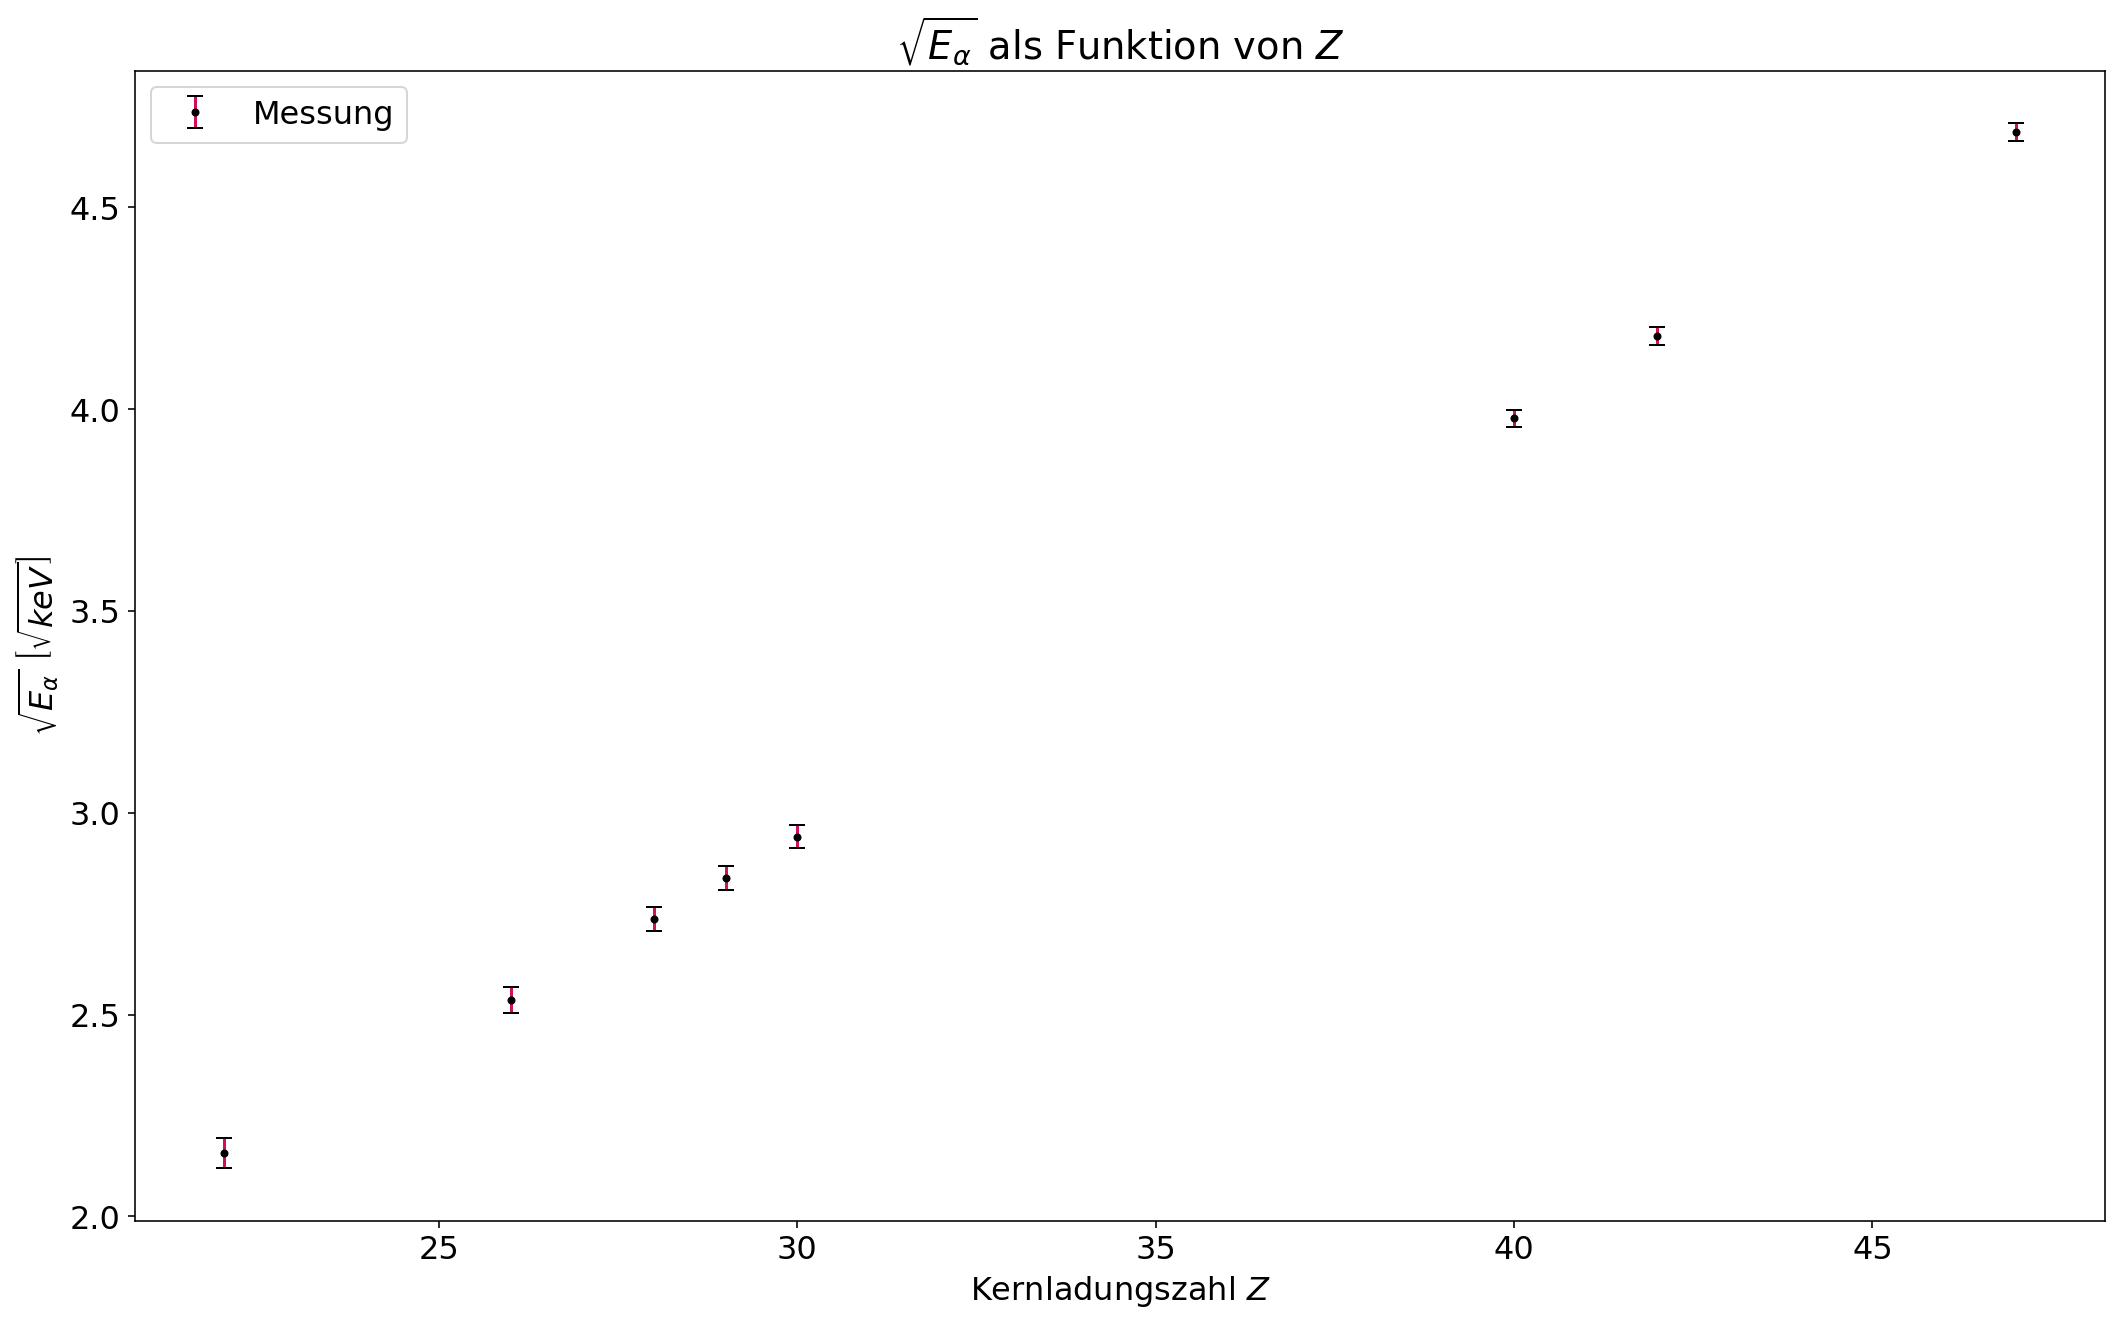

In [6]:
E_alpha = np.array([6.43 ,17.48 ,8.65 ,7.49 ,8.06 ,15.82 ,4.65 ,21.96]) 
E_alpha_err = np.array([0.16, 0.18, 0.17, 0.16, 0.17, 0.17, 0.16, 0.21])
Z = np.array([26, 42, 30, 28, 29, 40, 22, 47])

sqrt_E_alpha = np.sqrt(E_alpha)
sqrt_E_alpha_err = 1 / 2 * E_alpha_err / sqrt_E_alpha

plt.errorbar(Z, sqrt_E_alpha, yerr=sqrt_E_alpha_err, fmt='.', label='Messung')
plt.xlabel(r'Kernladungszahl $Z$')
plt.ylabel(r'$\sqrt{E_{\alpha}} \;\left[\sqrt{keV}\right]$')
plt.title(r'$\sqrt{E_{\alpha}}$ als Funktion von $Z$')
plt.legend()
plt.show()

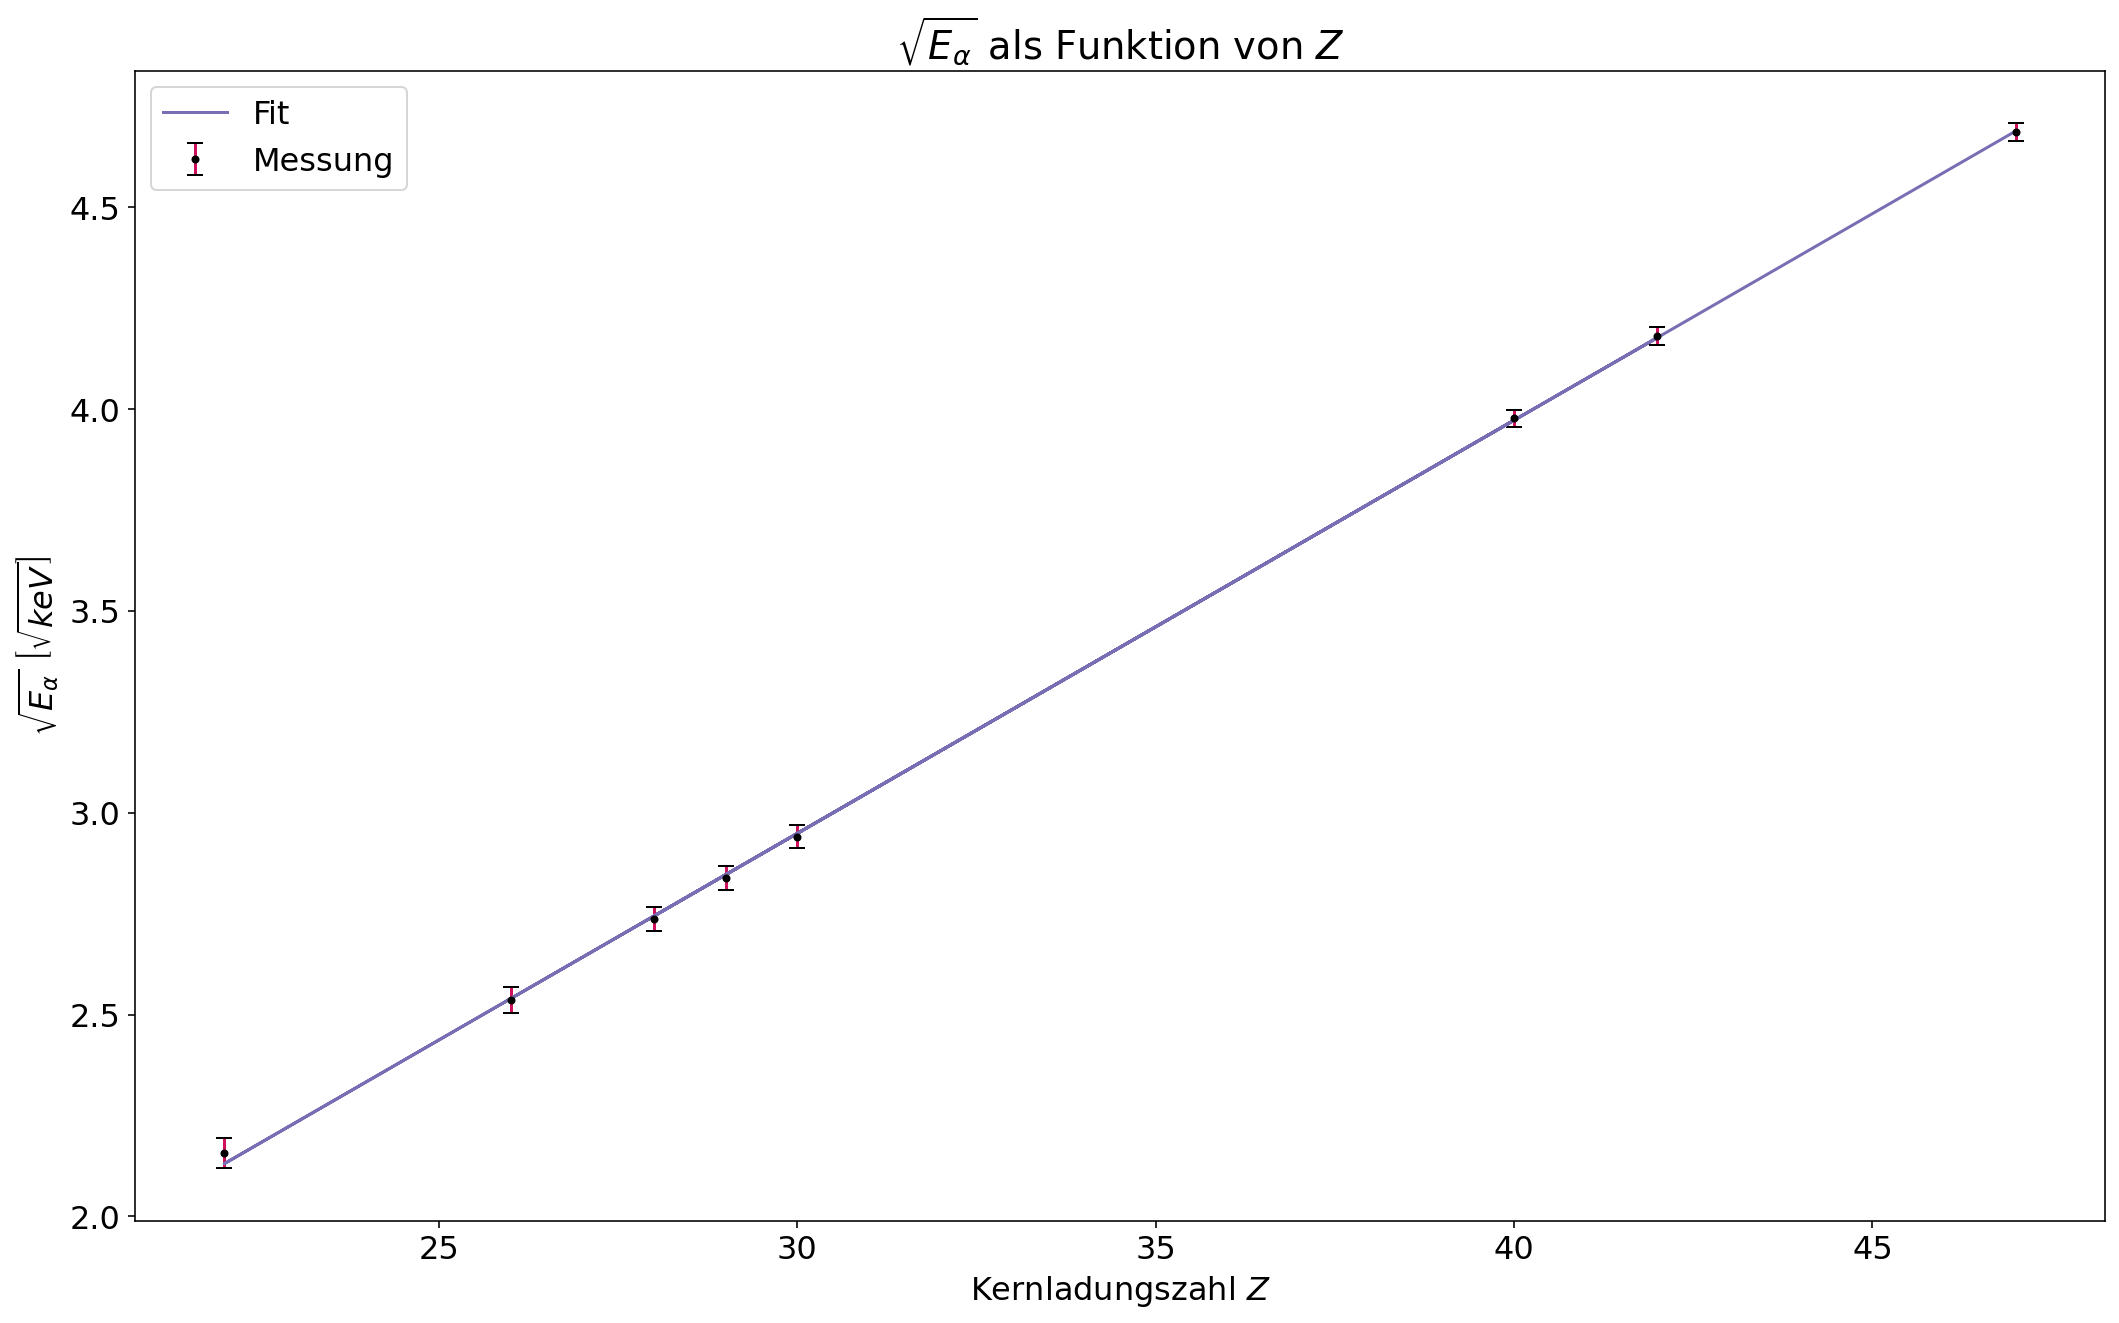

In [7]:
n1, n2 = 1, 2

def fit_func(x, sqrt_Er, sig12):
    return sqrt_Er*(x-sig12)*np.sqrt(1/n1**2 - 1/n2**2)

popt, pcov = curve_fit(fit_func, Z, sqrt_E_alpha, sigma=sqrt_E_alpha_err, absolute_sigma=True)


plt.errorbar(Z, sqrt_E_alpha, yerr=sqrt_E_alpha_err, fmt='.', label='Messung')
plt.plot(Z, fit_func(Z, *popt), label='Fit')

plt.xlabel(r'Kernladungszahl $Z$')
plt.ylabel(r'$\sqrt{E_{\alpha}} \;\left[\sqrt{keV}\right]$')
plt.title(r'$\sqrt{E_{\alpha}}$ als Funktion von $Z$')
plt.legend()
plt.savefig('figures/alpha.pdf', format='pdf')
plt.show()

In [8]:
sqrt_Er = popt[0]
sqrt_Er_err = np.sqrt(pcov.diagonal()[0])

Er = sqrt_Er**2 * 1000 # eV;
Er_err = 2 * sqrt_Er * sqrt_Er_err * 1000

sig12 = popt[1]
sig12_err = np.sqrt(pcov.diagonal()[1])

print(f'sqrt_Er = {sqrt_Er * np.sqrt(1000)} Standardfehler: {sqrt_Er_err * np.sqrt(1000)} sqrt(keV)')
print(f'Er = {Er} Standardfehler: {Er_err} eV')
print(f'sig12 = {sig12} Standardfehler: {sig12_err}')
print(f'{(abs(Er_lit-Er)/Er_err)} sigma')

sqrt_Er = 3.736782092742534 Standardfehler: 0.04163434254758325 sqrt(keV)
Er = 13.963540408641272 Standardfehler: 0.3111569313498353 eV
sig12 = 1.180993175151908 Standardfehler: 0.3975561239606396
1.173850523130086 sigma


# $K_{\beta}$-Linie

In [9]:
E_beta = np.array([7.05, 19.59, 9.60, 8.27, 8.92, 17.70, 5.08, 24.64]) 
E_beta_err = np.array([0.16, 0.21, 0.17, 0.17, 0.17, 0.17, 0.12, 0.23])
Z = np.array([26, 42, 30, 28, 29, 40, 22, 47])

sqrt_E_beta = np.sqrt(E_beta)
sqrt_E_beta_err = 1 / 2 * E_beta_err / sqrt_E_beta

plt.errorbar(Z, sqrt_E_beta, yerr=sqrt_E_beta_err, fmt='.', label='Messung')
plt.xlabel(r'Kernladungszahl $Z$')
plt.ylabel(r'$\sqrt{E_{\beta}} \;\left[\sqrt{keV}\right]$')
plt.title(r'$\sqrt{E_{\beta}}$ als Funktion von $Z$')
plt.legend()
plt.show()

In [10]:
n1, n2 = 1, 3

def fit_func(x, sqrt_Er, sig12):
    return sqrt_Er*(x-sig12)*np.sqrt(1/n1**2 - 1/n2**2)

popt, pcov = curve_fit(fit_func, Z, sqrt_E_beta, sigma=sqrt_E_beta_err, absolute_sigma=True)


plt.errorbar(Z, sqrt_E_beta, yerr=sqrt_E_beta_err, fmt='.', label='Messung')
plt.plot(Z, fit_func(Z, *popt), label='Fit')

plt.xlabel(r'Kernladungszahl $Z$')
plt.ylabel(r'$\sqrt{E_{\beta}} \;\left[\sqrt{keV}\right]$')
plt.title(r'$\sqrt{E_{\beta}}$ als Funktion von $Z$')
plt.legend()
plt.savefig('figures/beta.pdf', format='pdf')
plt.show()

In [11]:
sqrt_Er = popt[0]
sqrt_Er_err = np.sqrt(pcov.diagonal()[0])

Er = sqrt_Er**2 * 1000 # eV;
Er_err = 2 * sqrt_Er * sqrt_Er_err * 1000

sig12 = popt[1]
sig12_err = np.sqrt(pcov.diagonal()[1])

print(f'sqrt_Er = {sqrt_Er * np.sqrt(1000)} Standardfehler: {sqrt_Er_err * np.sqrt(1000)} sqrt(keV)')
print(f'Er = {Er} Standardfehler: {Er_err} eV')
print(f'sig12 = {sig12} Standardfehler: {sig12_err}')
print(f'{(abs(Er_lit-Er)/Er_err)} sigma')

sqrt_Er = 3.6717046213483266 Standardfehler: 0.03581213276920724 sqrt(keV)
Er = 13.481414826430658 Standardfehler: 0.2629831467780761 eV
sig12 = 1.6227831043418295 Standardfehler: 0.33327928408955393
0.4444157620057834 sigma
